https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+EWD01+2018_EWD_T1/info

### Lading Data

In [122]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Univariate Analysis

In [2]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

### 1.Continous Variables

In [3]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


### Categorical variables

In [4]:
#step1: get a list of categorical variables:
categorical_variables=train.dtypes[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [5]:
#%% step2. use the apply function in python to determine the number of unique values

train[categorical_variables].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

### Analyzing Race

In [6]:
#print the value of each category
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [7]:
#print the percentage of each category
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

### Analyzing Native country

In [8]:
#print the value of each category
print(train['Native.Country'].value_counts())

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [9]:
#print the percentage of each category
print(train['Native.Country'].value_counts()/train.shape[0])

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

## Multivariate Analysis

### 1.Both Categorical

In [34]:
#print the cross-tabulation
ct=pd.crosstab(train['Sex'],train['Income.Group'],margins=1)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


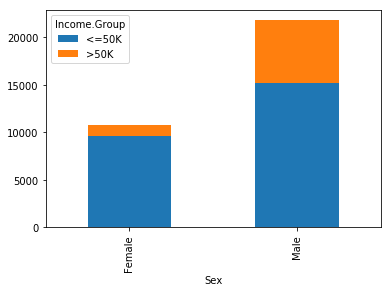

In [13]:
#we can also plot it using a stacked chart
%matplotlib inline
ct.plot.bar(stacked=1)

Income.Group     <=50K      >50K  All
Sex                                  
Female        0.890539  0.109461  1.0
Male          0.694263  0.305737  1.0
All           0.759190  0.240810  1.0
AxesSubplot(0.125,0.125;0.775x0.755)


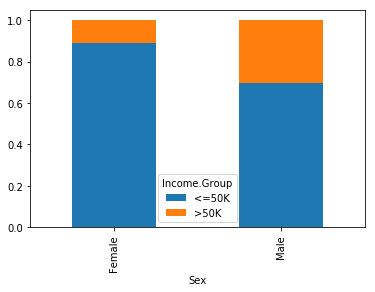

In [88]:
ct2=ct.apply(lambda x: x/float(x[-1]) ,axis=1)
print(ct2)
ct2=ct2.iloc[:-1,:-1].plot.bar(stacked=1,grid=0)
print(ct2)

## 2. Both continuous

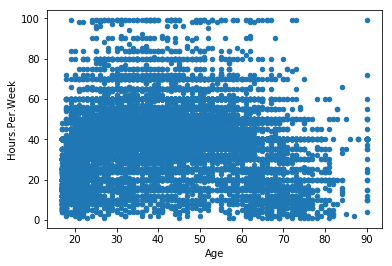

In [49]:
train.plot('Age','Hours.Per.Week',kind='scatter')

## 3.Categorical-Continuous combination

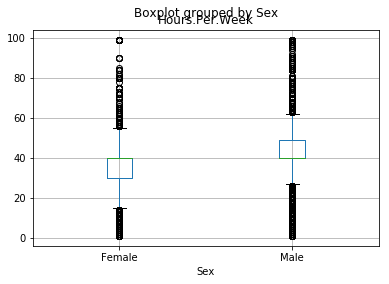

In [56]:
train.boxplot(column='Hours.Per.Week',by='Sex')

In [86]:
#quiz thing
# %time len(train[train['Sex']=='Male'][train['Income.Group']=='<=50K'])/train.shape[0] #long method
len(train[(train['Sex']=='Male') & (train['Income.Group']=='<=50K' ) ] )/21790 #short method

0.6942634235888022

In [66]:
#quiz thing
train['Age'].corr(train['Hours.Per.Week'])

0.06875570750955734

In [77]:
#quiz thing
train[train['Income.Group']=='>50K']['Occupation'].value_counts()

Exec-managerial      1968
Prof-specialty       1859
Sales                 983
Craft-repair          929
Adm-clerical          507
Transport-moving      320
Tech-support          283
Machine-op-inspct     250
Protective-serv       211
Other-service         137
Farming-fishing       115
Handlers-cleaners      86
Armed-Forces            1
Priv-house-serv         1
Name: Occupation, dtype: int64

In [85]:
#quiz thing
len(train[(train['Sex'] == 'Female') & (train['Income.Group'] == '>50K')]) / 10771  #short method

0.10946058861758426

## 1.Checking missing values

In [139]:
#checking on train data
train.apply(lambda x:sum(x.isnull()))

ID                  0
Age                 0
Workclass           0
Education           0
Marital.Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    583
Income.Group        0
dtype: int64

In [155]:
#checking on test data
test.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

### 2.imputation

In [150]:
#just checking
mode(test['Workclass']).mode[0]

C:\Users\MY\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: '<' not supported between instances of 'str' and 'float'

In [151]:
#this replace from Nan Nat to Nan so we can apply mode
train.replace(['NaN','NaT'],np.nan,inplace=True)
test.replace(['NaN','NaT'],np.nan,inplace=True)

In [156]:
from scipy.stats import mode
# mode(train['Workclass']).mode[0]
cols=['Workclass','Occupation','Native.Country']
for var in cols:
    train[var].fillna(mode(train[var].dropna()).mode[0],inplace=True)
    test[var].fillna(mode(test[var].dropna()).mode[0],inplace=True)

C:\Users\MY\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
